<a href="https://colab.research.google.com/github/chasubeen/python_selfstudy/blob/master/7_3.%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EB%AA%A8%EB%8D%B8%20%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**손실 곡선**

In [ ]:
# MNIST 데이터 셋 load, 훈련 세트와 검증 세트로 나누기
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size = 0.2,random_state = 42)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# 모델을 만드는 함수 정의하기
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28,28)))
  model.add(keras.layers.Dense(100,activation = 'relu'))
  if a_layer: # 매개변수로 케라스 층을 받아오기
    model.add(a_layer) # 은닉층 뒤에 또 하나의 층을 추가한다.
  model.add(keras.layers.Dense(10,activation = 'softmax'))
  return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit() 메서드의 결과를  history 변수에 저장하기
model.compile(loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled,train_target,epochs = 5,verbose = 0)

# verbose의 의미
# 훈련 과정 출력을 조절하는 hyper-parameter
# 1(default): 에포크마다 진행 막대와 함께 손실 등의 지표가 출력됨
# 2: 진행 막대를 빼고 출력됨
# 0: 훈련 과정을 나타내지 않겠다.

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


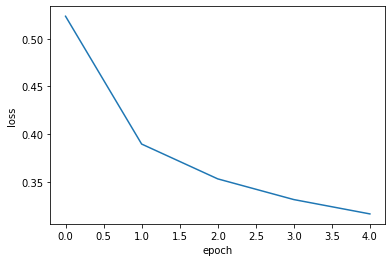

In [ ]:
import matplotlib.pyplot as plt
# 손실 그래프
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

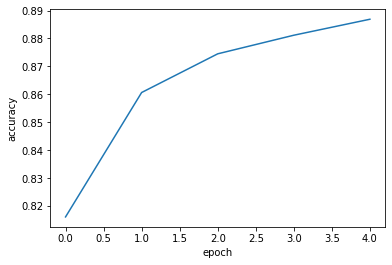

In [ ]:
# 정확도 그래프
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

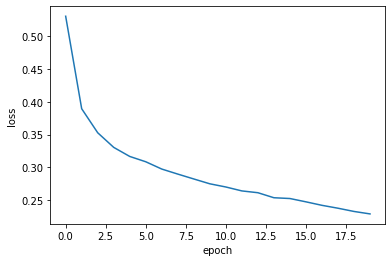

In [ ]:
# epoch 횟수를 20으로 늘려서 모델을 훈련하고 손실 그래프 그리기
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled,train_target,epochs = 20,verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

###**검증 손실**
- 인공 신경망 모델잎 최적화하는 대상은 정확도가 아닌 '손실 함수'
> 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 좋음

In [ ]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled,train_target,epochs = 20,verbose = 0,validation_data = (val_scaled,val_target))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


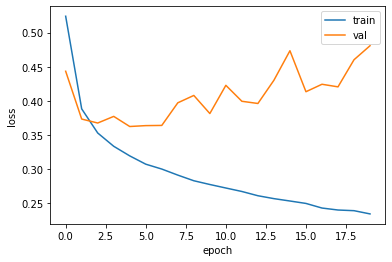

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# 초기에 검증 손실이 감소하다가 다섯 번째 에포크 만에 다시 상승하기 시작함 -> 전형적인 과대적합 모델이 만들어짐

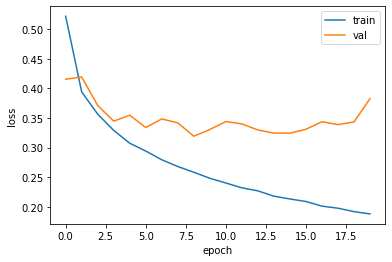

In [ ]:
# optimizer로 Adam을 적용해보기
model = model_fn()
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled,train_target,epochs = 20,verbose = 0,validation_data = (val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

###**드롭아웃**
- 훈련 과정에 있는 일부 뉴런을 랜덤하게 꺼서(=뉴런의 출력을 0으로 만들어 과대적합을 막기) 과대적합을 막는 기법
- 이전 층의 일부 뉴런이 랜덤하게 꺼진다 -> 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고, 모든 입력에 대해 주의를 기울여야 한다.
- 여러 개의 신경망을 앙상블하는 듯한 효과를 줄 수 있음

In [ ]:
# model_fn() 함수에 드롭아웃 객체를 전달하여 층 추가하기
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

# dropout 층은 훈련되는 모델 파라미터가 없음
# 입력과 출력의 크기가 동일함
# 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


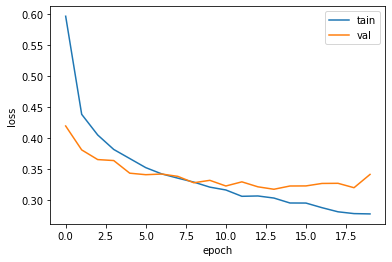

In [ ]:
# 훈련 손실과 검증 손실 그래프를 그려 비교하기
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled,train_target,epochs = 20,verbose = 0,validation_data = (val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['tain','val'])
plt.show()

# epoch을 20번 정도 돌린 결과 과대적합되었음을 확인할 수 있음 -> epoch 횟수를 10으로 하고 다시 훈련을 진행

###**모델 저장과 복원**

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled,train_target,epochs = 10,verbose = 0,validation_data = (val_scaled,val_target))

In [ ]:
# 훈련된 모델의 파라미터를 저장하는 save_weights() 메서드
model.save_weights('model-weights.h5')

In [ ]:
# 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드
model.save('model-whole.h5')

In [ ]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 May  8 15:28 model-weights.h5
-rw-r--r-- 1 root root 982664 May  8 15:29 model-whole.h5


In [ ]:
# 실험1> 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용하기
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [ ]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled),axis = -1)
print(np.mean(val_labels == val_target))

0.8795833333333334


In [ ]:
# 실험2> model-shole.h5 파일에서 새로운 모델을 만들어 바로 사용하기
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3397 - accuracy: 0.8796


[0.339679479598999, 0.8795833587646484]

###**콜백**
- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 해주는 객체
- keras.callbacks 패키지 아래에 있는 클래스들
- fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용함

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only = True)
model.fit(train_scaled,train_target,epochs = 20,verbose = 0,validation_data = (val_scaled,val_target),callbacks = [checkpoint_cb])

In [ ]:
# 예측 수행하기
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3145 - accuracy: 0.8863


[0.3145085573196411, 0.8862500190734863]

In [ ]:
# Early stopping
# 과대적합이 시작되기 전에 훈련을 미리 중지하는 것
# 훈련 epoch 횟수를 제한하는 역할

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,restore_best_weights = True)
history = model.fit(train_scaled,train_target,epochs = 20,verbose = 0,validation_data = (val_scaled,val_target),callbacks = [checkpoint_cb,early_stopping_cb])

In [ ]:
print(early_stopping_cb.stopped_epoch)

13


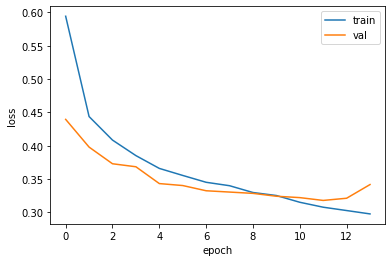

In [ ]:
# 훈련 손실과 검증 손실 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
# 검증 세트에 대한 성능 확인하기
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3179 - accuracy: 0.8827


[0.3178806006908417, 0.8826666474342346]